In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 11 15:59:25 2019

@author: sambo
"""
#################################

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

def load_mnist(path, kind):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels



In [4]:
import matplotlib.pyplot as plt

def trainvalplot(le,lt,lv):
# Plot training & validation accuracy values
    plt.plot(le,lt)
    plt.plot(le,lv)
    plt.ylabel('error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [5]:
import matplotlib.pyplot as plt

def graphplotepoch(le,p,r,f):

    plt.plot(le,p)
    plt.plot(le,r)
    plt.plot(le,f)
    plt.ylabel('Metrics')
    plt.xlabel('Epoch')
    plt.legend(['Precision', 'Recall','F1 score'], loc='upper left')
    plt.show()

Running for epochs... 50
epoch is  0  training loss is  2.3026282582795043
epoch is  0  validation loss is  2.239907645790534


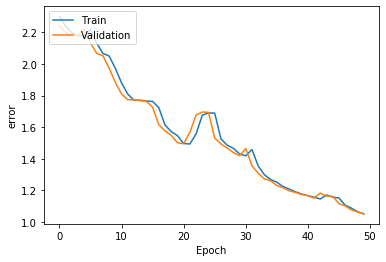

accuracy 0.6747
Precision =  0.6620730746846822  Recall=  0.6747 F1 =  0.6439592039735065
Running for epochs... 100
epoch is  0  training loss is  2.298089510622767
epoch is  0  validation loss is  2.2352945051769546


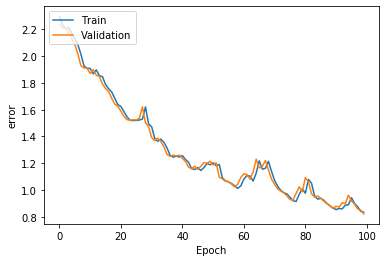

accuracy 0.7349
Precision =  0.7143319252835423  Recall=  0.7349 F1 =  0.7070144878761706
Running for epochs... 200
epoch is  0  training loss is  2.298900255093728
epoch is  0  validation loss is  2.258912567875453
epoch is  100  training loss is  0.8491589936065941
epoch is  100  validation loss is  0.835840318589058


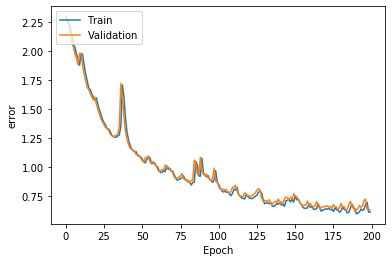

accuracy 0.7697
Precision =  0.778516357053988  Recall=  0.7697 F1 =  0.7629906524312539
Running for epochs... 500
epoch is  0  training loss is  2.30951666157499
epoch is  0  validation loss is  2.2468613549045844
epoch is  100  training loss is  0.8638578305123951
epoch is  100  validation loss is  0.8747067748929398
epoch is  200  training loss is  0.6906050350673953
epoch is  200  validation loss is  0.6958893321631558
epoch is  300  training loss is  0.6052926426445301
epoch is  300  validation loss is  0.6617915051411348
epoch is  400  training loss is  0.5422915755685358
epoch is  400  validation loss is  0.5950662004345358


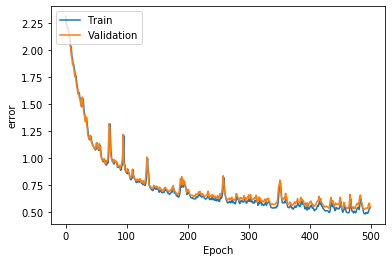

accuracy 0.8034
Precision =  0.8106942430873206  Recall=  0.8034 F1 =  0.7945315092866279
Running for epochs... 1000
epoch is  0  training loss is  2.310702938604243
epoch is  0  validation loss is  2.236500761284606
epoch is  100  training loss is  0.843714754722481
epoch is  100  validation loss is  0.8290975127007946
epoch is  200  training loss is  0.6755412810124398
epoch is  200  validation loss is  0.6952837196334255
epoch is  300  training loss is  0.5585742256118296
epoch is  300  validation loss is  0.606173611807391
epoch is  400  training loss is  0.5195310924544848
epoch is  400  validation loss is  0.5456634862147814
epoch is  500  training loss is  0.49621748361714973
epoch is  500  validation loss is  0.5195533150685632
epoch is  600  training loss is  0.5310190387063627
epoch is  600  validation loss is  0.5454823362802388
epoch is  700  training loss is  0.45595973921557253
epoch is  700  validation loss is  0.5219143035942473
epoch is  800  training loss is  0.419954

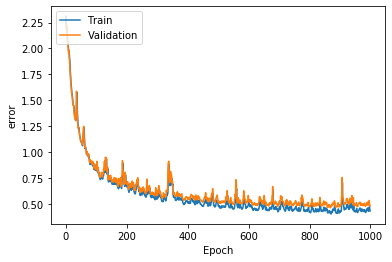

accuracy 0.8298
Precision =  0.8350208620446355  Recall=  0.8298 F1 =  0.8316640312226924
Running for epochs... 1500
epoch is  0  training loss is  2.2994025876493827
epoch is  0  validation loss is  2.2488584584751696
epoch is  100  training loss is  0.8875345965738516
epoch is  100  validation loss is  0.9412187871518258
epoch is  200  training loss is  0.6645326140747501
epoch is  200  validation loss is  0.6877125298233697
epoch is  300  training loss is  0.5911521385546208
epoch is  300  validation loss is  0.5938799156464628
epoch is  400  training loss is  0.562412385612325
epoch is  400  validation loss is  0.5811896483505224
epoch is  500  training loss is  0.5188568680461801
epoch is  500  validation loss is  0.5385153655948419
epoch is  600  training loss is  0.4841309356810197
epoch is  600  validation loss is  0.5179921120368055
epoch is  700  training loss is  0.4407484410439103
epoch is  700  validation loss is  0.4974591113942636
epoch is  800  training loss is  0.48964

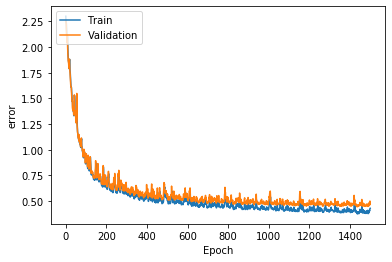

accuracy 0.834
Precision =  0.8376005561850068  Recall=  0.834 F1 =  0.8284658557328308


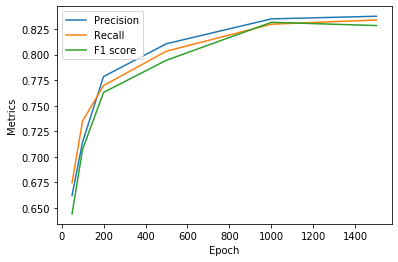

In [4]:
"Task 1: Single hidden Layer NN from scratch"

from sklearn.metrics import precision_recall_fscore_support

X_train, y_train = load_mnist('data/fashion', kind='train')


X_test, y_test = load_mnist('data/fashion', kind='t10k')


def y_format(labels,x):
    y=np.zeros(shape=(x,10))
    for i in range (len(labels)):
        y[i][labels[i]]=1
    return y

  
##############################################################
h_nodes=64
l_rate=0.5

def sigmoid(x):
    a=0
    a=1/(1+np.exp(-x))
    return a

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    a=np.exp(x) / np.sum(np.exp(x), axis=0)
    
    return a


def loss(Y, Y_cap):

    L_sum = np.sum(np.multiply(Y, np.log(Y_cap)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    #print(Y.shape)
    #print(Y_cap.shape)

    return L

def validation(w1,w2,b1,b2):
    
    yv=y_format(y_test,10000)
    yv=yv.T  

    z1=np.matmul(w1,(np.transpose(X_test)))
    z1=z1+b1

    x1=sigmoid(z1)


    #hidden layer
    z2=np.matmul(w2,x1)
    z2=z2+b2

    x2=softmax(z2)
    
    v_loss=loss(yv,x2)
    
    return v_loss
    
    
#Training function        
def training(epoch,h_nodes):
    
    list_val_loss=[]
    list_epoch=[]
    list_train_loss=[]
    
    #weight matrices
    w1 = np.random.randn(h_nodes,784)*0.01
    w2 = np.random.randn(10,h_nodes)*0.01
    y=y_format(y_train,60000)
    y=y.T  

    #bias 
    b1=np.zeros(shape=(h_nodes,1))
    b2=np.zeros(shape=(10,1))


    for i in range(epoch):
    
        z1=np.matmul(w1,(np.transpose(X_train)))
        z1=z1+b1

        x1=sigmoid(z1)


        #hidden layer
        z2=np.matmul(w2,x1)
        z2=z2+b2

        x2=softmax(z2)
        t_loss=loss(y,x2)
    

        dz2=x2-y
        dw2=(np.matmul(dz2,(np.transpose(x1))))/60000
  
        db2=(1 / 60000) * np.sum(dz2, axis=1, keepdims=True)

        p=np.matmul(np.transpose(w2),dz2)
        dz1=np.multiply(p,x1)
        dz1=np.multiply(dz1,(1-x1))

        dw1=(np.matmul(dz1,X_train))/60000
        db1=(1 / 60000) * np.sum(dz1, axis=1, keepdims=True)
    
        w2=w2-(l_rate*dw2)
        w1=w1- l_rate*dw1
        b2=b2-l_rate*db2
        b1=b1-l_rate*db1
        
        list_train_loss.append(t_loss)
        v_loss=validation(w1,w2,b1,b2)
        list_val_loss.append(v_loss)
        list_epoch.append(i)
        
        if(i%100==0):
            print ("epoch is ",i," training loss is ", t_loss)           
            print ("epoch is ",i," validation loss is ",v_loss)
            
            
        
    return w1,w2,b1,b2,list_val_loss,list_train_loss,list_epoch


def testing(w1,w2,b1,b2):

    z1=np.matmul(w1,(np.transpose(X_test)))
    z1=z1+b1

    x1=sigmoid(z1)


    #hidden layer
    z2=np.matmul(w2,x1)
    z2=z2+b2

    x2=softmax(z2)
    x2=x2.T
    
    ypredicted=[]
    
    count=0
    for i in range(len(x2)):
        templ=x2[i].tolist()
        y_predicted=templ.index(max(templ))
        if(y_predicted==y_test[i]):
            count+=1
        ypredicted.append(y_predicted)
    
    
    print("accuracy", count/(len(x2)))
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, ypredicted, average='weighted')
    print("Precision = ",precision," Recall= ",recall,"F1 = ",f1)
    return (precision,recall,f1)

#Varying epochs and comparing result
epochlist=[50,100,200,500,1000,1500] 
pl=[]
rl=[]
fl=[]
for epoch in epochlist:
    print("Running for epochs...",epoch)
    wt1,wt2,bi1,bi2,lv,lt,le=training(epoch,h_nodes)
    trainvalplot(le,lt,lv)
    p,r,f=testing(wt1,wt2,bi1,bi2)
    pl.append(p)
    rl.append(r)
    fl.append(f)
    
graphplotepoch(epochlist,pl,rl,fl)



Running for hidden nodes... 20
epoch is  0  training loss is  2.298398856037647
epoch is  0  validation loss is  2.272268614525493
epoch is  100  training loss is  1.3523896666724098
epoch is  100  validation loss is  1.3507965228089527
epoch is  200  training loss is  1.1006913466221429
epoch is  200  validation loss is  1.1235794310368896
epoch is  300  training loss is  1.1408843212506812
epoch is  300  validation loss is  1.136972925384641
epoch is  400  training loss is  0.9132244652312543
epoch is  400  validation loss is  0.9937699291414939
epoch is  500  training loss is  0.8844384612025816
epoch is  500  validation loss is  0.8832113539843418


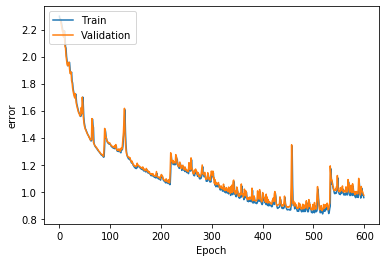

accuracy 0.6151
Precision =  0.6255054321623408  Recall=  0.6151 F1 =  0.5510963787330646
Running for hidden nodes... 30
epoch is  0  training loss is  2.297141887663599
epoch is  0  validation loss is  2.2691557765370076
epoch is  100  training loss is  0.9690320967529158
epoch is  100  validation loss is  0.9784966351089969
epoch is  200  training loss is  0.7612501225863133
epoch is  200  validation loss is  0.7529794520091145
epoch is  300  training loss is  0.7297673762519609
epoch is  300  validation loss is  0.7511900380459936
epoch is  400  training loss is  0.6891231218782785
epoch is  400  validation loss is  0.6865288399238546
epoch is  500  training loss is  0.5968251206245455
epoch is  500  validation loss is  0.659281225160769


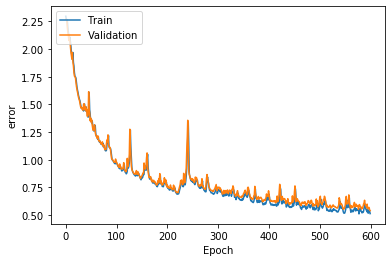

accuracy 0.8182
Precision =  0.8182860345366464  Recall=  0.8182 F1 =  0.8178036530403684
Running for hidden nodes... 60
epoch is  0  training loss is  2.3043005006272987
epoch is  0  validation loss is  2.2672887853374903
epoch is  100  training loss is  0.8519747143200918
epoch is  100  validation loss is  0.8758243684188363
epoch is  200  training loss is  0.7910673185913767
epoch is  200  validation loss is  0.9588832916156544
epoch is  300  training loss is  0.576404914622191
epoch is  300  validation loss is  0.6819881693594524
epoch is  400  training loss is  0.5808801140415175
epoch is  400  validation loss is  0.6304361027979076
epoch is  500  training loss is  0.4799438196311047
epoch is  500  validation loss is  0.5229508018777793


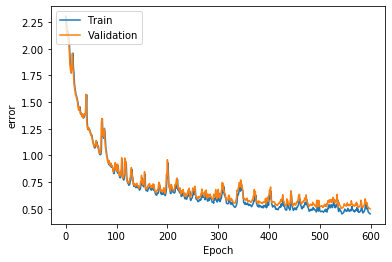

accuracy 0.8197
Precision =  0.8185581128353737  Recall=  0.8197 F1 =  0.814060457761969
Running for hidden nodes... 100
epoch is  0  training loss is  2.309022469274273
epoch is  0  validation loss is  2.2506624672502427
epoch is  100  training loss is  0.8082086665419992
epoch is  100  validation loss is  0.7863331820281748
epoch is  200  training loss is  0.6585623041403688
epoch is  200  validation loss is  0.6461286246828662
epoch is  300  training loss is  0.5126338200729607
epoch is  300  validation loss is  0.5440693093446936
epoch is  400  training loss is  0.49073816304408274
epoch is  400  validation loss is  0.5404388465384276
epoch is  500  training loss is  0.5201461551228728
epoch is  500  validation loss is  0.5569130803963301


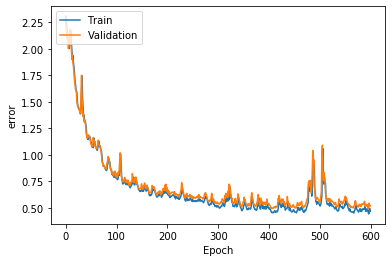

accuracy 0.8149
Precision =  0.8351092914760598  Recall=  0.8149 F1 =  0.817555054903226


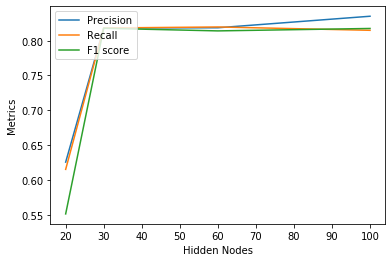

In [9]:
#Varying hidden nodes....

import matplotlib.pyplot as plt

def graphplothn(le,p,r,f):

    plt.plot(le,p)
    plt.plot(le,r)
    plt.plot(le,f)
    plt.ylabel('Metrics')
    plt.xlabel('Hidden Nodes')
    plt.legend(['Precision', 'Recall','F1 score'], loc='upper left')
    plt.show()

hnlist=[20,30,60,100] 
pl=[]
rl=[]
fl=[]
for hn in hnlist:
    print("Running for hidden nodes...",hn)
    wt1,wt2,bi1,bi2,lv,lt,le=training(600,hn)
    trainvalplot(le,lt,lv)
    p,r,f=testing(wt1,wt2,bi1,bi2)
    pl.append(p)
    rl.append(r)
    fl.append(f)
    
graphplothn(hnlist,pl,rl,fl)




In [11]:
#############################################
"Task 2: Multi-Layered Neural Network 2 hidden layer"


x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 15
hidden=100


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



def multilayer(batch_size,num_classes,epochs,hidden):

    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(784,)))
    #model.add(Dropout(0.2))
    model.add(Dense(hidden, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return (history,model,score[1])

(history,model,result)=multilayer(batch_size,num_classes,epochs,hidden)




60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 28us/step - loss: 5.0185 - accuracy: 0.6860 - val_loss: 0.8285 - val_accuracy: 0.7120
Epoch 2/15
60000/60000 [==============================] - 2s 26us/step - loss: 0.7662 - accuracy: 0.7669 - val_loss: 0.7217 - val_accuracy: 0.77

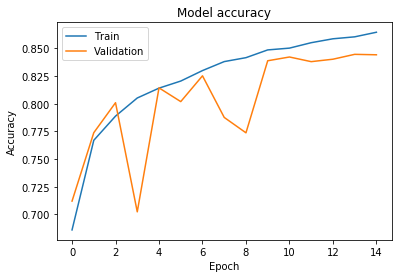

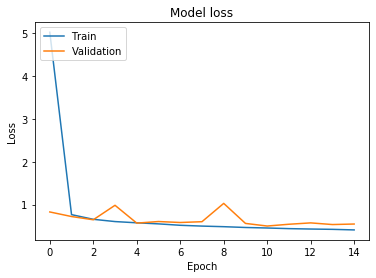

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [2]:
#############################################
"Task 2: Multi-Layered Neural Network 4 hidden layer"


x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 15
hidden=100


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



def multilayer(batch_size,num_classes,epochs,hidden):

    model = Sequential()
    model.add(Dense(hidden, activation='relu', input_shape=(784,)))
    #model.add(Dropout(0.2))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    model.add(Dense(hidden, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return (history,model,score[1])

(history,model,result)=multilayer(batch_size,num_classes,epochs,hidden)





Using TensorFlow backend.


60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 109,810
Trainable params: 109,810
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [=

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 34us/step - loss: 3.5945 - accuracy: 0.6946 - val_loss: 1.0799 - val_accuracy: 0.7264
Test loss: 1.0799254958629607
Test accuracy: 0.7264000177383423
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Out

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 6.6680 - accuracy: 0.6861 - val_loss: 1.1337 - val_accuracy: 0.7380
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.8349 - accuracy: 0.7591 - val_loss: 1.1568 - val_accuracy: 0.7341
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.6584 - accuracy: 0.7970 - val_loss: 0.7005 - val_accuracy: 0.7954
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.5943 - accuracy: 0.8126 - val_loss: 0.6113 - val_accuracy: 0.8094
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.5517 - accuracy: 0.8260 - val_loss: 0.5878 - val_accuracy: 0.8251
Epoch 6/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.5327 - accuracy: 0.8300 - val_loss: 0.5660 - val_accuracy: 0.8292
Epoch 7/20
60000/60000 [==============================] - 2s 27us/st

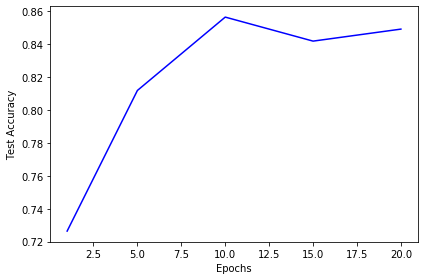

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_24 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 3.0711 - accuracy: 0.5407 - val_loss: 1.0665 - val_accuracy: 0.6049
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.9245 - accuracy: 0.6348 - val_loss: 0.8903 - val_accuracy: 0.6360
Epoch 3/5
60000/60000 [===============

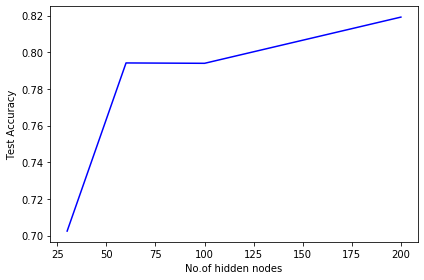

In [14]:
#Varying epochs and hidden nodes for Multilayer Keras

import matplotlib.pyplot as plt

def graph_plot_epoch(epochsl,accl):
    
    plt.plot(epochl, accl, color='blue')
    plt.xlabel('Epochs',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)

    plt.tight_layout()
    plt.savefig('Accuracy_ML_epoch.png')
    plt.show()
    
def graph_plot_hn(hnl,accl):
    
    plt.plot(hnl, accl, color='blue')
    plt.xlabel('No.of hidden nodes',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)

    plt.tight_layout()
    plt.savefig('Accuracy_ML_hn.png')
    plt.show()    

epochl=[1,5,10,15,20]
hnl=[30,60,100,200]

e_accl=[]
h_accl=[]
for epoch in epochl:
                (history,model,result)=multilayer(128,10,epoch,100)
                e_accl.append(result)
            
graph_plot_epoch(epochl,e_accl)
                
for hn in hnl:
                (history,model,result)=multilayer(128,10,5,hn)
                h_accl.append(result)
  

graph_plot_hn(hnl,h_accl)



In [15]:
#######################################
"Task 3 : CNN using keras"


x_train, y_train = load_mnist('data/fashion', kind='train')
x_test, y_test = load_mnist('data/fashion', kind='t10k')

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


batch_size = 128
num_classes = 10
epochs = 5

#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


def cnn(batch_size,num_classes,epoch,hn1,hn2):
    
    model = Sequential()
    model.add(Conv2D(hn1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(hn2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epoch,verbose=1,validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return (model,history,score[1])

model,history,result=cnn(batch_size,num_classes,5,30,60)




x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4918 - accuracy: 0.8238 - val_loss: 0.3731 - val_accuracy: 0.8676
Epoch 2/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.3000 - accuracy: 0.8906 - val_loss: 0.2994 - val_accuracy: 0.8891
Epoch 3/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2451 - accuracy: 0.9098 - val_loss: 0.2810 - val_accuracy: 0.8957
Epoch 4/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2112 - accuracy: 0.9224 - val_loss: 0.2633 - val_accuracy: 0.9053
Epoch 5/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1805 - accuracy: 0.9333 - val_loss: 0.2689 - val_accuracy: 0.9068
Test loss: 0.2688854058742523
Test accuracy: 0.9067999720573425


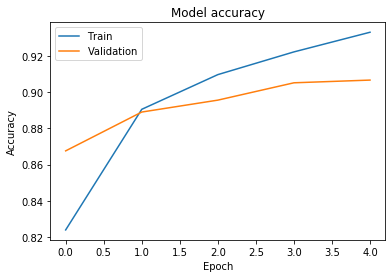

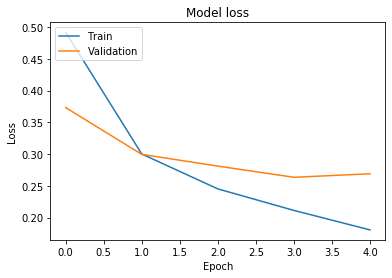

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4863 - accuracy: 0.8263 - val_loss: 0.3661 - val_accuracy: 0.8686
Test loss: 0.36608113560676575
Test accuracy: 0.8686000108718872
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 96s 2ms/step - loss: 0.4889 - accuracy: 0.8242 - val_loss: 0.3290 - val_accuracy: 0.8828
Epoch 2/2
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2911 - accuracy: 0.8944 - val_loss: 0.3014 - val_accuracy: 0.8930
Test loss: 0.3014033869743347
Test accuracy: 0.8930000066757202
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 100s 2ms/step - loss: 0.4995 - accuracy: 0.8216 - val_loss: 0.3466 - val_accuracy: 0.8752
Epoch 2/3
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2949 - accuracy: 0.8914 - val_loss: 0.2937 - val_accurac

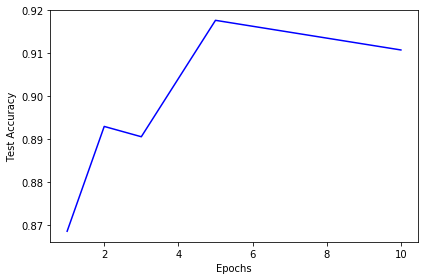

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 565us/step - loss: 0.5271 - accuracy: 0.8084 - val_loss: 0.4279 - val_accuracy: 0.8377
Epoch 2/5
60000/60000 [==============================] - 32s 538us/step - loss: 0.3226 - accuracy: 0.8839 - val_loss: 0.3136 - val_accuracy: 0.8842
Epoch 3/5
60000/60000 [==============================] - 36s 604us/step - loss: 0.2664 - accuracy: 0.9042 - val_loss: 0.3274 - val_accuracy: 0.8803
Epoch 4/5
60000/60000 [==============================] - 33s 546us/step - loss: 0.2297 - accuracy: 0.9155 - val_loss: 0.2521 - val_accuracy: 0.9098
Epoch 5/5
60000/60000 [==============================] - 32s 539us/step - loss: 0.2029 - accuracy: 0.9253 - val_loss: 0.2507 - val_accuracy: 0.9109
Test loss: 0.25066487073898314
Test accuracy: 0.9108999967575073
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 55s 921us/step - loss: 0.4975 - accura

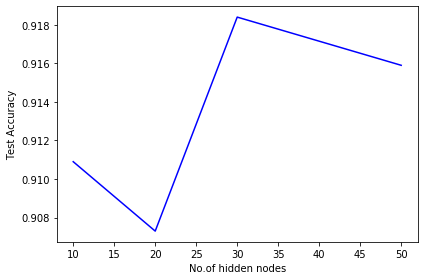

In [22]:
#Varying epochs and hidden nodes for CNN Keras

def graph_plot_epoch(epochsl,accl):
    
    plt.plot(epochl, accl, color='blue')
    plt.xlabel('Epochs',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)

    plt.tight_layout()
    plt.savefig('Accuracy_CNN_epoch.png')
    plt.show()
    
def graph_plot_hn(hnl,accl):
    
    plt.plot(hnl, accl, color='blue')
    plt.xlabel('No.of hidden nodes',fontsize=10)
    plt.ylabel('Test Accuracy',fontsize=10)

    plt.tight_layout()
    plt.savefig('Accuracy_CNN_hn.png')
    plt.show()    

epochl=[1,2,3,5,10]
hnl=[10,20,30,50]

e_accl=[]
h_accl=[]
for epoch in epochl:
                model,history,result=cnn(128,10,epoch,32,64)
                e_accl.append(result)
graph_plot_epoch(epochl,e_accl)

for hn in hnl:
                model,history,result=cnn(128,10,5,hn,(hn*2))
                h_accl.append(result)
  

graph_plot_hn(hnl,h_accl)